# Étude de cas - Data Science - Dong-Pha PHAM

### Problématique :

Vous avez à votre disposition un jeu de données qui contient des identifiants anonymisés de 4 centres commerciaux français ainsi que des identifiants de téléphones dont les propriétaires ont visité ces centres commerciaux avec la date et l'heure des différents pings observés au cours de la visite.

L'objectif de l'étude est, à partir de ces données, de déterminer les horaires d'ouverture de chacun des centres pour chaque jour de la semaine. Autrement dit, nous proposons un algorithme qui permettra de déterminer les horaires d'ouverture d'un centre ne faisant pas partie de ce dataset à partir de ses données de fréquentation.

In [ ]:
# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Etape 1 : Analyse exploratoire des données (EDA)
Ici, nous utilisations EDA pour explorer, analyser et visualiser le dataset.

In [ ]:
# Importer le dataset
data = pd.read_csv("D:/at_home_test_data_study_centers_201909.csv.csv")

In [ ]:
data.head()

,shopping_center_id,device_local_date,device_hash_id
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 10:00:25,6fdffac307
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:13:15,386141ebd8
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 9:07:06,b06242b848
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,2019-09-14 17:14:49,c13cc52e82
4,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,2019-09-14 10:17:35,f339ddf999


In [ ]:
# Nombre des identifiants de centre commercial sont dans chaque centre commercial
df = data[['shopping_center_id']]
df.value_counts()

shopping_center_id                  
599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    39827
cb2d5bb6-c372-4a51-8231-4ffa288a0c28    15639
b43e9e4f-acd1-4941-874d-e0c5650ab91e    15080
0cd35523-1eca-4f09-ab0d-0b506ae9d986    11292
dtype: int64

In [ ]:
# Nombre de lignes dans le datase
print ('Nombre de lignes dans le dataset : ', len(data))

Nombre de lignes dans le dataset :  81838


In [ ]:
# Nombre de centre 
print('Nombre de centres: ', data['shopping_center_id'].nunique())

Nombre de centres:  4


In [ ]:
# Nombre de devise
print('Nombre de devise : ', data['device_hash_id'].nunique())

Nombre de devise :  5702


In [ ]:
# Récupérer l'heure la plus ancienne de ping observé
print ('Heure la plus ancienne de ping observé : ',data['device_local_date'].min())


Heure la plus ancienne de ping observé :  2019-09-01 0:19:53


In [ ]:
# Récupérer l'heure la plus récente de ping observé
print('Heure la plus récente de ping observé : ', data['device_local_date'].max())

Heure la plus récente de ping observé :  2019-09-17 9:59:55


Le dataset contient **3 colonnes** et **81 838 entrées** :

- shopping_center_id : représente les identifiants hachés de **4 centres commerciaux français**
- device_local_data : représente la date et l'heure des différents pings observés lors de la visite du **2019-09-01 au 2019-09-17**
- device_hash_id : représente les identifiants hachés de **5702 téléphones** dont les propriétaires ont visité ces centres commerciaux



Pour explorer davantage la date et l'heure, nous allons convertir la colonne "device_local_date" (objets actuels) en type datetime pandas, puis extraire plus d'informations (telles que le jour de la semaine, la date, l'heure, l'heure) de cette colonne.

In [ ]:
# Le but de cette fonction est utilisé pour normaliser les données horaires à une demi-heure. Exemple : 10h36 devient 10h30

def convert_date_to_datetime(df):
    df['device_local_datetime'] = pd.to_datetime(df['device_local_date'], format='%Y-%m-%d %H:%M:%S.%f')
    df = df.drop(columns=['device_local_date'])
    return df

In [ ]:
data_converted = convert_date_to_datetime(data)

In [ ]:
data_converted.head()

,shopping_center_id,device_hash_id,device_local_datetime
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,6fdffac307,2019-09-14 10:00:25
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,386141ebd8,2019-09-14 17:13:15
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,b06242b848,2019-09-14 09:07:06
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,c13cc52e82,2019-09-14 17:14:49
4,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,f339ddf999,2019-09-14 10:17:35


#### Nous créons de nouvelles variables extraites de la date qui nous servirons plus tard

In [ ]:
def extract_info_from_datetime(df):
    df['week_day'] = df['device_local_datetime'].dt.day_name()
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    from pandas.api.types import CategoricalDtype
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    df['week_day'] = df['week_day'].astype(cat_type)
    
    df['date'] = df['device_local_datetime'].dt.date
    df['hour'] = df['device_local_datetime'].dt.hour
    df['time_rounded'] = df['device_local_datetime'].dt.round('30min').dt.time
    return df


In [ ]:
data_extracted = extract_info_from_datetime(data_converted)

In [ ]:
data_extracted.head()

,shopping_center_id,device_hash_id,device_local_datetime,week_day,date,hour,time_rounded
0,b43e9e4f-acd1-4941-874d-e0c5650ab91e,6fdffac307,2019-09-14 10:00:25,Saturday,2019-09-14,10,10:00:00
1,b43e9e4f-acd1-4941-874d-e0c5650ab91e,386141ebd8,2019-09-14 17:13:15,Saturday,2019-09-14,17,17:00:00
2,b43e9e4f-acd1-4941-874d-e0c5650ab91e,b06242b848,2019-09-14 09:07:06,Saturday,2019-09-14,9,09:00:00
3,b43e9e4f-acd1-4941-874d-e0c5650ab91e,c13cc52e82,2019-09-14 17:14:49,Saturday,2019-09-14,17,17:00:00
4,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,f339ddf999,2019-09-14 10:17:35,Saturday,2019-09-14,10,10:30:00


#### Maintenant, nous visualisons le nombre de visites de chaque centre commercial à différentes heures de la semaine

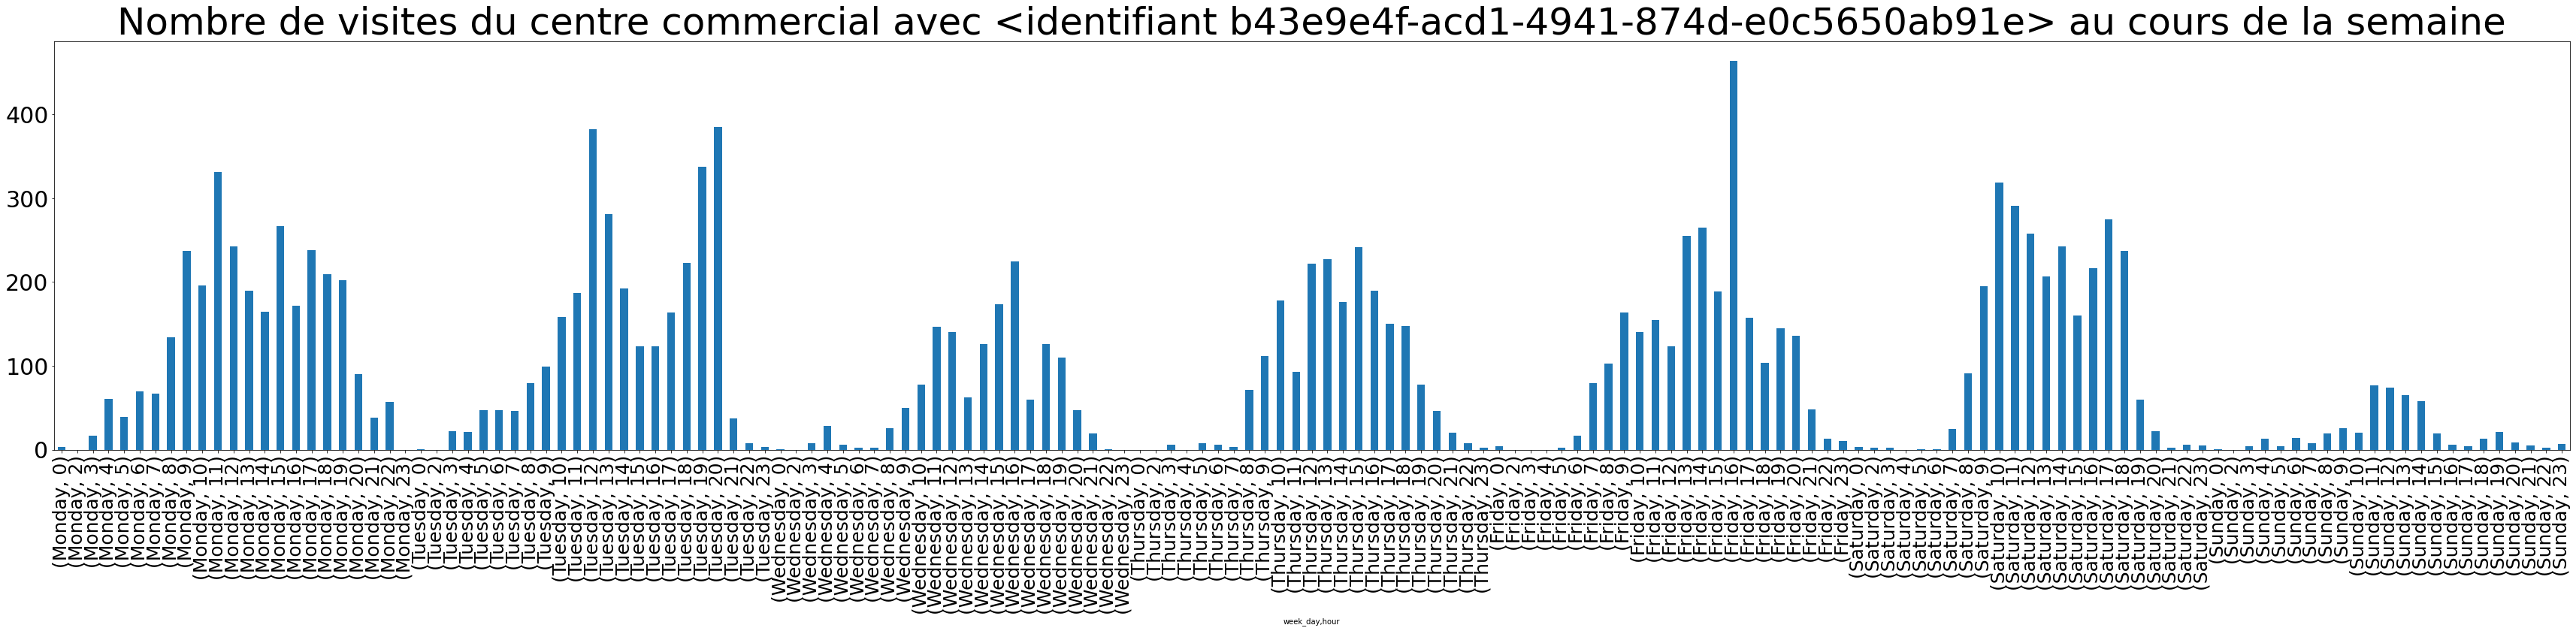

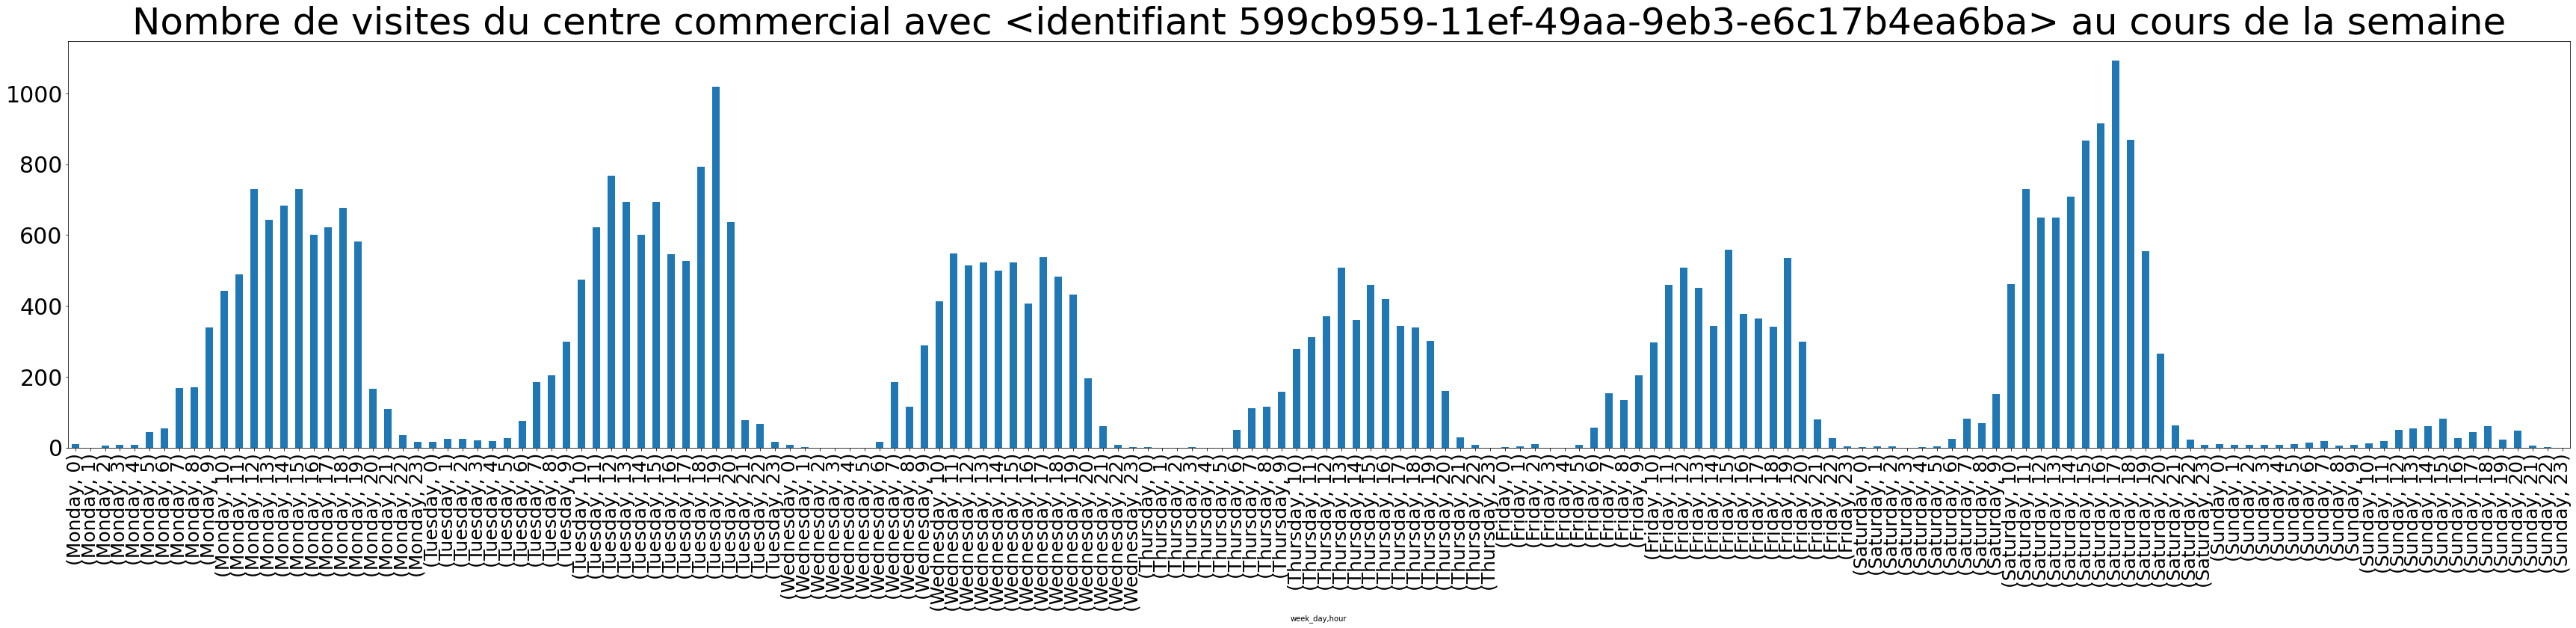

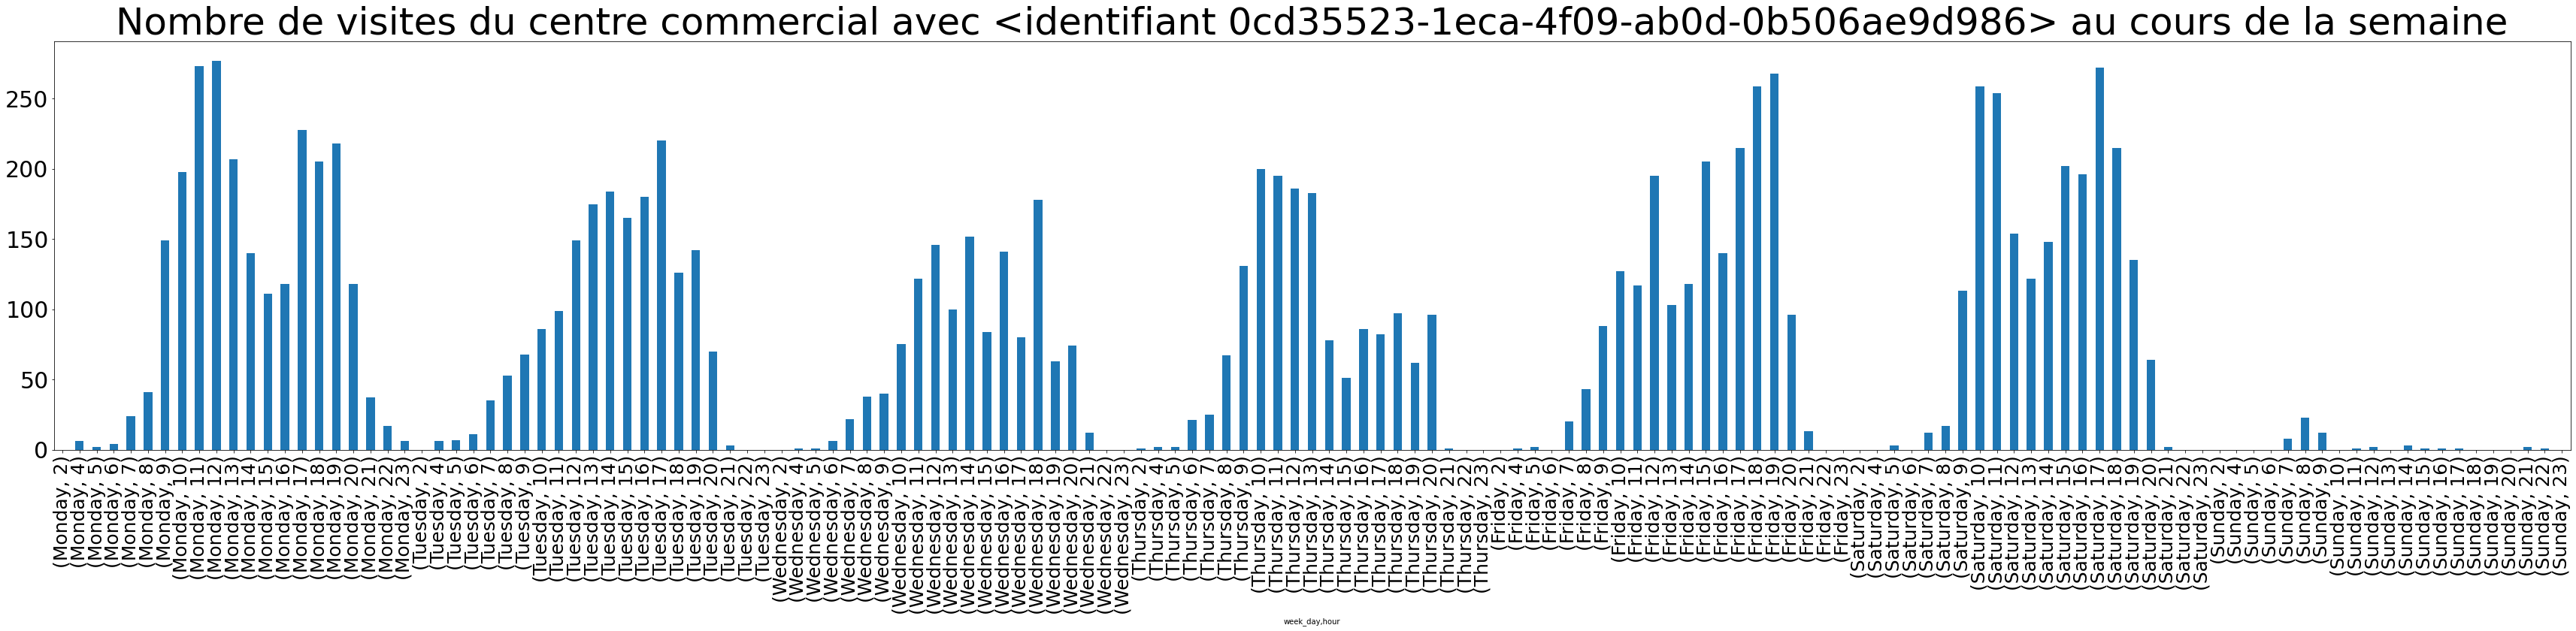

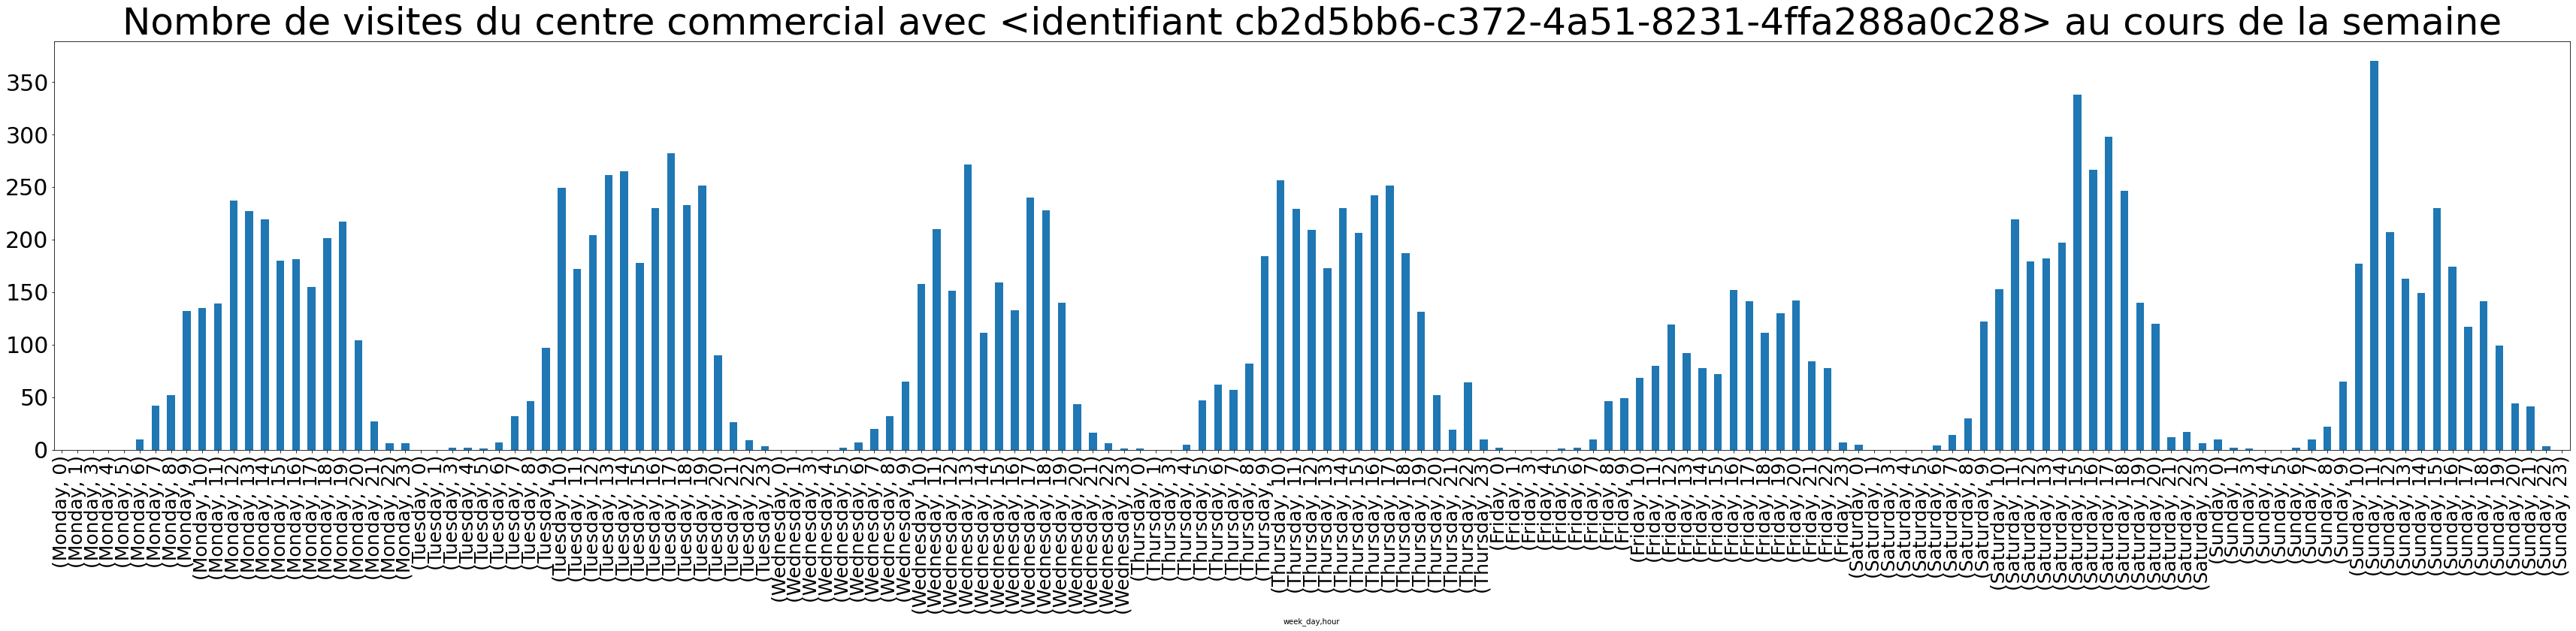

In [ ]:
for shop_id in data_extracted['shopping_center_id'].unique():
    data_of_one_center = data_extracted.query("shopping_center_id==@shop_id")
    plt.figure(figsize=(60,10))
    data_of_one_center.sort_values(by=['week_day','hour']).groupby(['week_day','hour'])['device_hash_id'].count().plot(kind='bar', rot=90 )
    plt.tick_params(axis='x', labelsize=25)
    plt.tick_params(axis='y', labelsize=30)
    plt.title(f"Nombre de visites du centre commercial avec <identifiant {shop_id}> au cours de la semaine",size=50)
    plt.show()

Selon les visualisations, d'une part, il est évident que la majeure partie du trafic de l'appareil provient de **8h à 21h** tous les jours de la semaine sauf le dimanche. Le dimanche, les répartitions de visites varient d'une boutique à l'autre. D'autre part, pendant les heures de fermeture, il y a une présence de visiteurs. Nous considérerons ces visiteurs comme **le personnel**. 

Nous savons que, dans tout centre commercial, il y a **un personnel** qui est présent en dehors des heures d'ouverture du centre commercial. Exemple : les agents de propreté, les vigiles, les vendeurs, etc.

Nous essayons de les identifier afin de les retirer du dataset pour ne pas les confondre avec des clients.

## Etape 2 : Construction de l'algorithme

**Etape 2.1: Filtrage le personnel**

L'idée de cette étape est de savoir comment détecter que device_hash_id est présent au moins **X jours** sur les **17 jours** d'historique dont nous disposons. X sera un paramètre que nous pourrons modifier si nécessaire.

Pour mieux filtrer le personnel, nous supprimerons également tout device_hash_id qui a passé plus de Y heures en une journée dans le centre commercial. Donc, nous considérerons :

- Toute personne présente dans le centre commercial plus de **X jours** **ou** présente dans le centre commercial plus de **Y heures** dans une journée en tant que **le personnel**.

In [ ]:
def filter_non_customer_visit(df,day_threshold, hour_threshold):
    
    # Obtenir la liste des identifiants d'appareils qui présentent plus de "day_threshold days"
    df_1 = df[['device_hash_id', 'date']].drop_duplicates()
    day_count = df_1.groupby('device_hash_id')['date'].count().reset_index(name='day_count')
    list_staff_1 = day_count[day_count['day_count']>day_threshold]['device_hash_id']
    
    
    # Obtenir la liste des identifiants d'appareils qui présentent plus de "hour_threshold" heures en une journée
    df_2 = df[['device_hash_id','date', 'week_day','hour']].drop_duplicates()
    hour_count = df_2.groupby(['device_hash_id','date', 'week_day'])['hour'].count().reset_index(name="hour_count")
    list_staff_2 = hour_count[hour_count['hour_count']>hour_threshold]['device_hash_id']
    
    
    list_staff_all = list(set(list_staff_1).union(set(list_staff_2))) # la liste totale du personnel est l'union de "list_staff_1" et "list_staff_22"
    
    
    df = df[~df['device_hash_id'].isin(list_staff_all)] # Filtrer les visites du personnel
    
    df = df[df['time_rounded']>=datetime.time(7,0,0)] # De plus, cela n'a pas de sens de considérer les visites avant 7h du matin comme des visites de clients
    
    return df
    

Dans notre cas, nous définirons **day_threshold = 4** et **hour_threshold = 6**, ce qui signifie que nous considérons tous les appareils qui visitent un centre commercial plus de **4 jours**, ou plus de **6 heures par jour**, comme étant les appareils du personnel de ce centre, il faut donc les supprimer.

In [ ]:
data_filtered_staff = filter_non_customer_visit(data_extracted,4,6)

#### Etape 2.2:  Implémentation d'autres règles commerciales

Comme observé, la plupart du trafic vient de **(8h00 à 21h00)**. Cependant, le trafic est faible tôt le matin **(7h00-8h00)** et tard le soir **(20h00-22h00)**, alors que le coût d'ouverture pendant ces intervalles peut être plus élevé que d'habitude. Par conséquent, pour optimiser le profit, certains centres commerciaux peuvent préférer ouvrir après **X heures du matin**, ou fermer avant **Y heures du soir** pour économiser le coût d'exploitation tout en servant la plupart (**disons, 95 %**) des clients.

Nous allons écrire une autre fonction pour implémenter ces règles commerciales :

In [ ]:
"""
Cette fonction consiste à implémenter d'autres règles commerciales

@param: df - Dataframe : jeu de données
@param: percent_of_cus_to_serve - float : le pourcentage minimum de clients que les centres commerciaux aimeraient servir
@param: open_hour_prefer and close_hour_prefer - datetime.time : l'heure d'ouverture et de fermeture de préférence

"""

def implement_business_rules(df, percent_of_cus_to_serve=0.95,open_hour_prefer=datetime.time(8,0,0), close_hour_prefer=datetime.time(22,0,0)):
    df = df.drop_duplicates(subset=['shopping_center_id','device_hash_id', 'date'])
    
    df_count_traffic = df.groupby(['shopping_center_id','week_day']).agg(cus_count=('device_hash_id','count'),min_hour=('time_rounded','min'),max_hour=('time_rounded','max')).reset_index()
    
    df_prefer = df[df['time_rounded'].between(open_hour_prefer,close_hour_prefer)]
    
    df_prefer_count_traffic = df_prefer.groupby(['shopping_center_id','week_day']).agg(cus_count_prefer=('device_hash_id','count'),min_hour_prefer=('time_rounded','min'),max_hour_prefer=('time_rounded','max')).reset_index()
    
    df_count_join = df_count_traffic.merge(df_prefer_count_traffic,how='left',on=['shopping_center_id','week_day'])
    
    df_count_join["cus_percent"] = df_count_join['cus_count_prefer']/df_count_join['cus_count']
    
    # Si le pourcentage réel de client servi dans l'intervalle de préférence >= le pourcentage minimum de clients que les centres commerciaux aimeraient servir (percent_of_cus_to_serve), nous sélectionnons cet intervalle comme l'heure d'ouverture et de fermeture,
    # Sinon, sélectionner l'heure minimale et maximale des visites réelles comme heure d'ouverture et de fermeture
    
    df_count_join["open_hour"] = np.where(df_count_join["cus_percent"]>=percent_of_cus_to_serve,df_count_join['min_hour_prefer'],df_count_join['min_hour'])
    df_count_join["close_hour"] = np.where(df_count_join["cus_percent"]>=percent_of_cus_to_serve,df_count_join['max_hour_prefer'],df_count_join['max_hour'])
    
    
    return df_count_join[['shopping_center_id','week_day','open_hour','close_hour']]
    

#### Dans notre cas, nous définissons percent_of_cus_to_serve = 95 %, open_hour_prefer = 8 AM, close_hour_prefer = 22 PM

In [ ]:
implement_business_rules(data_filtered_staff)

,shopping_center_id,week_day,open_hour,close_hour
0,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Monday,08:30:00,22:00:00
1,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Tuesday,09:00:00,21:00:00
2,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Wednesday,08:30:00,21:00:00
3,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Thursday,08:30:00,21:00:00
4,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Friday,09:00:00,21:30:00
5,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Saturday,09:00:00,21:00:00
6,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Sunday,07:30:00,22:30:00
7,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Monday,08:00:00,22:00:00
8,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Tuesday,08:00:00,21:30:00
9,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Wednesday,08:00:00,21:30:00


#### En résumé, notre algorithme pour déterminer les heures d'ouverture et de fermeture d'un centre commercial comprend ces étapes :

- Étape 1 : Extraire les informations de la date et de l'heure des visites
- Étape 2 : Filtrer les visiteurs qui ne sont pas des clients (le personnel du centre)
- Étape 3 : Mettre en œuvre d'autres règles commerciales, notamment : le pourcentage minimum de clients à servir pour répondre aux besoins des magasins ou les préférences des heures d'ouverture et de fermeture


La fonction ci-dessous implémente l'intégralité de l'algorithme :

In [ ]:
def determine_opening(df, shopping_center_id, day_threshold=4,hour_threshold=6,percent_of_cus_to_serve=0.95,open_hour_prefer=datetime.time(8,0,0), close_hour_prefer=datetime.time(22,0,0)):
    df_converted = convert_date_to_datetime(df)
    df_extracted = extract_info_from_datetime(df_converted)
    df_filtered_staff = filter_non_customer_visit(df_extracted,day_threshold,hour_threshold)
    df_business_rules = implement_business_rules(df_filtered_staff,percent_of_cus_to_serve,open_hour_prefer,close_hour_prefer)
    
    return df_business_rules[df_business_rules['shopping_center_id']==shopping_center_id]

# Résultat

In [ ]:
# Regarder les heures d'ouverture et de fermeture déterminées du centre commercial d'id <0cd35523-1eca-4f09-ab0d-0b506ae9d986> tous les jours de la semaine sauf dimanche
determine_opening(data,'0cd35523-1eca-4f09-ab0d-0b506ae9d986')

,shopping_center_id,week_day,open_hour,close_hour
0,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Monday,08:30:00,22:00:00
1,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Tuesday,09:00:00,21:00:00
2,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Wednesday,08:30:00,21:00:00
3,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Thursday,08:30:00,21:00:00
4,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Friday,09:00:00,21:30:00
5,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Saturday,09:00:00,21:00:00
6,0cd35523-1eca-4f09-ab0d-0b506ae9d986,Sunday,07:30:00,22:30:00


In [ ]:
# Regarder les heures d'ouverture et de fermeture déterminées du centre commercial d'id <599cb959-11ef-49aa-9eb3-e6c17b4ea6ba> tous les jours de la semaine sauf dimanche
determine_opening(data,'599cb959-11ef-49aa-9eb3-e6c17b4ea6ba')

,shopping_center_id,week_day,open_hour,close_hour
7,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Monday,08:00:00,22:00:00
8,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Tuesday,08:00:00,21:30:00
9,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Wednesday,08:00:00,21:30:00
10,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Thursday,08:00:00,21:00:00
11,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Friday,08:30:00,22:00:00
12,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Saturday,08:30:00,22:00:00
13,599cb959-11ef-49aa-9eb3-e6c17b4ea6ba,Sunday,08:00:00,22:00:00


In [ ]:
# Regarder les heures d'ouverture et de fermeture déterminées du centre commercial d'id <b43e9e4f-acd1-4941-874d-e0c5650ab91e> tous les jours de la semaine sauf dimanche
determine_opening(data,'b43e9e4f-acd1-4941-874d-e0c5650ab91e')

,shopping_center_id,week_day,open_hour,close_hour
14,b43e9e4f-acd1-4941-874d-e0c5650ab91e,Monday,08:00:00,22:00:00
15,b43e9e4f-acd1-4941-874d-e0c5650ab91e,Tuesday,08:00:00,21:30:00
16,b43e9e4f-acd1-4941-874d-e0c5650ab91e,Wednesday,08:00:00,22:00:00
17,b43e9e4f-acd1-4941-874d-e0c5650ab91e,Thursday,08:30:00,21:00:00
18,b43e9e4f-acd1-4941-874d-e0c5650ab91e,Friday,08:00:00,22:00:00
19,b43e9e4f-acd1-4941-874d-e0c5650ab91e,Saturday,08:00:00,22:00:00
20,b43e9e4f-acd1-4941-874d-e0c5650ab91e,Sunday,09:00:00,21:30:00


In [ ]:
# Regarder les heures d'ouverture et de fermeture déterminées du centre commercial d'id <cb2d5bb6-c372-4a51-8231-4ffa288a0c28> tous les jours de la semaine sauf dimanche
determine_opening(data,'cb2d5bb6-c372-4a51-8231-4ffa288a0c28')

,shopping_center_id,week_day,open_hour,close_hour
21,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,Monday,08:30:00,22:00:00
22,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,Tuesday,08:00:00,22:00:00
23,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,Wednesday,08:00:00,21:30:00
24,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,Thursday,09:00:00,22:00:00
25,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,Friday,08:00:00,22:00:00
26,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,Saturday,08:30:00,22:00:00
27,cb2d5bb6-c372-4a51-8231-4ffa288a0c28,Sunday,08:30:00,22:00:00


## Commentaires

- En regardant les 4 tableaux ci-dessus, nous pouvons déterminer les heures d'ouverture de chacun des 4 centres commerciaux pour chaque jour de la semaine.
- Actuellement, les visites du client sont détectées par certaines règles de bon sens, alors peut-être qu'ils ne sont pas précis à 100%. Si le centre commercial exige que tout son personnel enregistre ses appareils, cela conduit à l'ensemble de données contenant une colonne supplémentaire classant si le trafic provient des clients ou du personnel. Cela nous aidera à filtrer avec précision le trafic du personnel.

## Recommandation

- Dans certaines situations particulières (par exemple la situation de Covid 19), certains centres commerciaux peuvent vouloir limiter le nombre de clients visitant à tout moment de la journée (Ce nombre soit dynamique en fonction de la taille des centre commerciaux). L'algorithme doit également être modifié pour refléter cette règles commerciales.

- Pour améliorer cet ensemble de données, nous devons ajouter d'autres types de données. Nous donnons quelques exemples :
    - Le comportement de consommation des clients. Par exemple, si nous observons qu'il y a beaucoup de clients ont besoin de faire les courses, de faire du shopping, de manger ou de prendre un café à 8h00, nous pouvons envisager d'ouvrir le centre avant  8h00.

    - L’identifiant de client. Exemple : Nous envisageons d'utiliser des caméras pour suivre les clients (suivi) et observer le moment où ils entrent dans le centre commercial au lieu d'utiliser leur identifiant de téléphone (ping). En effet, d'un point de vue personnel, il y a beaucoup des clients qui entrent dans le centre sans utiliser le wifi ou sans enregistrer leur identifiant ou quelque temps plus tard lorsqu'ils entreront dans le centre, ils accéderont au wifi central. Cela affecte l'exactitude des données car nous utilisons l'identité du téléphone du client pour déterminer quand le client est entré dans le centre.
- Une fois que nous aurons un ensemble de données "très précises", nous pourrons sélectionner exactement quelles “feature engineering” qui affectent directement ou indirectement les heures d'ouverture du centre. Par conséquent, nous allons construire un algorithme pour déterminer les heures d'ouverture avec une plus grande précision.

